# Additional Visualization Tools for K-Means Results

This notebook contains helper functions for creating detailed visualizations of K-Means clustering results.

## Overview
This notebook provides:
1. Feature comparison plots by cluster
2. Cluster characteristics heatmap
3. Feature pair scatter plots

**Note**: Requires the clustered dataset from `kmeans_dataset.ipynb` to run.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)


## Function 1: Feature Comparison Plot

Create box plots comparing feature distributions across clusters.


In [2]:
def create_feature_comparison_plot(df_clustered, feature_names, k):
    """
    Create a comprehensive comparison plot showing cluster characteristics
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
    
    for idx, feature in enumerate(feature_names[:6]):  # Limit to 6 features
        ax = axes[idx]
        data_to_plot = []
        labels_list = []
        
        for cluster_id in range(k):
            cluster_data = df_clustered[df_clustered['cluster'] == cluster_id][feature]
            data_to_plot.append(cluster_data)
            labels_list.append(f'Cluster {cluster_id}')
        
        bp = ax.boxplot(data_to_plot, labels=labels_list, patch_artist=True)
        
        # Color the boxes
        for patch, color in zip(bp['boxes'], colors[:k]):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        ax.set_title(f'{feature.replace("_", " ").title()}', fontweight='bold')
        ax.set_ylabel('Value', fontsize=10)
        ax.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('Feature Distributions by Cluster', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('feature_comparison_by_cluster.png', dpi=150, bbox_inches='tight')
    print("Feature comparison plot saved as 'feature_comparison_by_cluster.png'")


## Function 2: Cluster Heatmap

Create a heatmap showing cluster characteristics.


In [3]:
def create_cluster_heatmap(cluster_stats, k):
    """
    Create a heatmap showing cluster characteristics
    """
    plt.figure(figsize=(12, 6))
    
    # Normalize data for better visualization
    cluster_stats_normalized = cluster_stats.copy()
    for col in cluster_stats.columns:
        col_min = cluster_stats[col].min()
        col_max = cluster_stats[col].max()
        if col_max > col_min:
            cluster_stats_normalized[col] = (cluster_stats[col] - col_min) / (col_max - col_min)
    
    sns.heatmap(cluster_stats_normalized.T, 
                annot=True, 
                fmt='.2f', 
                cmap='YlOrRd',
                cbar_kws={'label': 'Normalized Value'},
                linewidths=1,
                linecolor='black')
    
    plt.title('Cluster Characteristics Heatmap', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.savefig('cluster_heatmap.png', dpi=150)
    print("Cluster heatmap saved as 'cluster_heatmap.png'")


## Function 3: Feature Pair Scatter Plots

Create multiple scatter plots comparing different feature pairs.


In [4]:
def create_interactive_scatter(df_clustered, feature_names, k):
    """
    Create multiple scatter plots comparing different feature pairs
    """
    # Select interesting feature pairs
    pairs = [
        ('daily_screen_time_hours', 'homework_completion_rate'),
        ('attention_score', 'math_score'),
        ('sleep_hours', 'attention_score'),
        ('math_score', 'reading_score')
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
    
    for idx, (feat1, feat2) in enumerate(pairs):
        ax = axes[idx]
        
        for cluster_id in range(k):
            cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
            ax.scatter(cluster_data[feat1], cluster_data[feat2],
                      c=colors[cluster_id], label=f'Cluster {cluster_id}',
                      alpha=0.6, s=50)
        
        ax.set_xlabel(feat1.replace('_', ' ').title(), fontsize=11)
        ax.set_ylabel(feat2.replace('_', ' ').title(), fontsize=11)
        ax.set_title(f'{feat1.replace("_", " ").title()} vs {feat2.replace("_", " ").title()}', 
                    fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('Feature Pair Relationships by Cluster', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('feature_pair_scatter.png', dpi=150, bbox_inches='tight')
    print("Feature pair scatter plots saved as 'feature_pair_scatter.png'")


## Example Usage

Load the clustered dataset and create all visualizations.


In [5]:
# Load clustered data (if available)
# First, check if the clustered dataset exists
import os

if os.path.exists('child_learning_behavior_clustered.csv'):
    clustered_file = 'child_learning_behavior_clustered.csv'
elif os.path.exists('../child_learning_behavior_clustered.csv'):
    clustered_file = '../child_learning_behavior_clustered.csv'
else:
    print("Clustered dataset not found. Please run kmeans_dataset.ipynb first.")
    clustered_file = None

if clustered_file:
    # Load clustered data
    df_clustered = pd.read_csv(clustered_file)
    
    # Get number of clusters
    k = df_clustered['cluster'].nunique()
    
    # Feature names
    feature_names = [
        'daily_screen_time_hours',
        'homework_completion_rate',
        'attention_score',
        'sleep_hours',
        'math_score',
        'reading_score'
    ]
    
    # Calculate cluster statistics
    cluster_stats = df_clustered.groupby('cluster')[feature_names + ['age']].mean()
    
    print(f"Loaded dataset with {len(df_clustered)} records and {k} clusters")
    print("Ready to create visualizations!")
else:
    print("Skipping visualization creation - dataset not found.")


Loaded dataset with 300 records and 3 clusters
Ready to create visualizations!


Creating additional visualizations...


/var/folders/r8/27lw2f9j5tz3wp68w4smh7s40000gn/T/ipykernel_5627/1341690729.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels_list, patch_artist=True)
/var/folders/r8/27lw2f9j5tz3wp68w4smh7s40000gn/T/ipykernel_5627/1341690729.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels_list, patch_artist=True)
/var/folders/r8/27lw2f9j5tz3wp68w4smh7s40000gn/T/ipykernel_5627/1341690729.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels_list, patch_artist=True)
/var/folders/r8/27lw2f9j5tz3wp68w4

Feature comparison plot saved as 'feature_comparison_by_cluster.png'
Cluster heatmap saved as 'cluster_heatmap.png'
Feature pair scatter plots saved as 'feature_pair_scatter.png'

All visualizations created successfully!


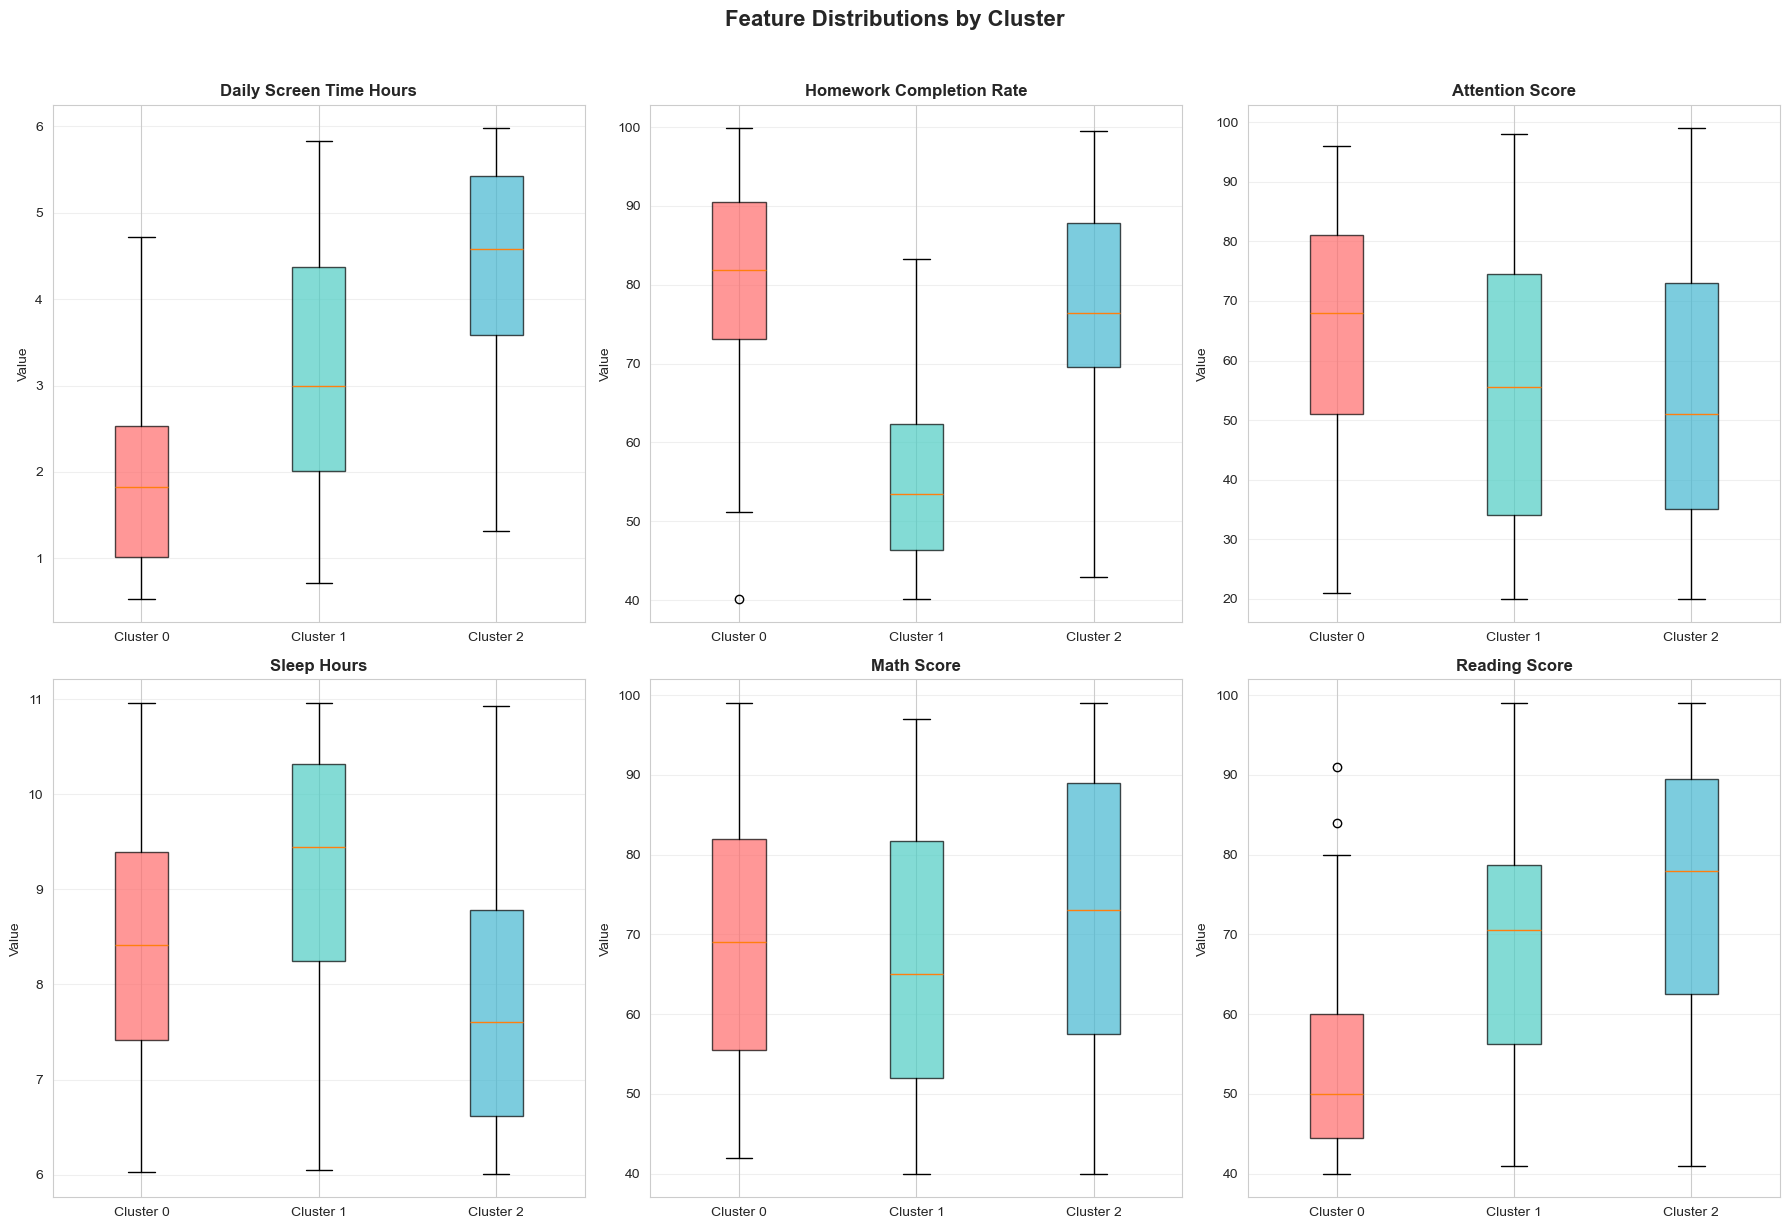

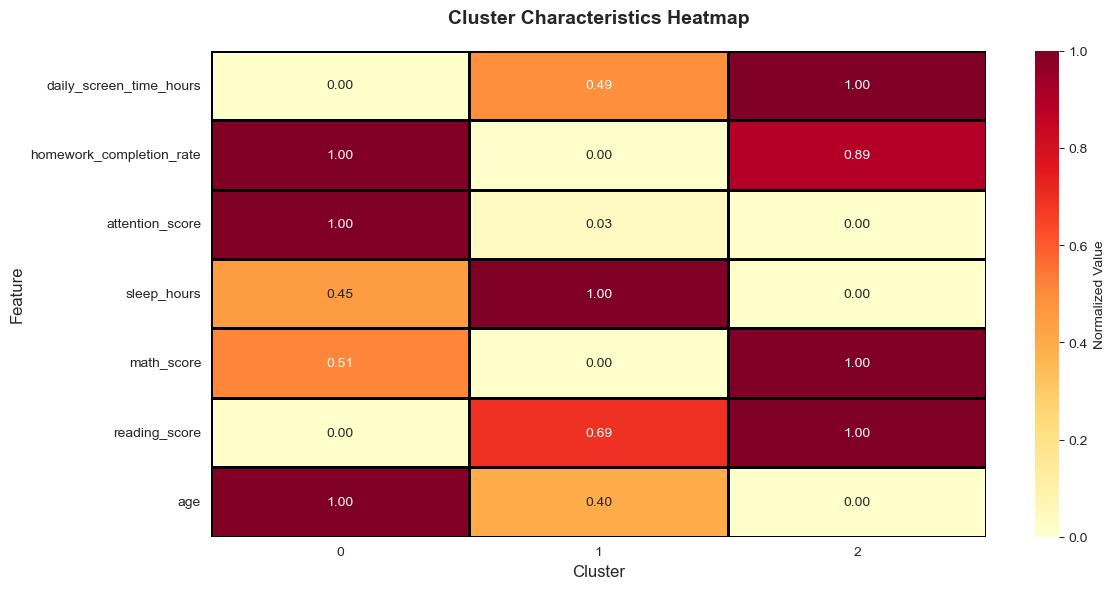

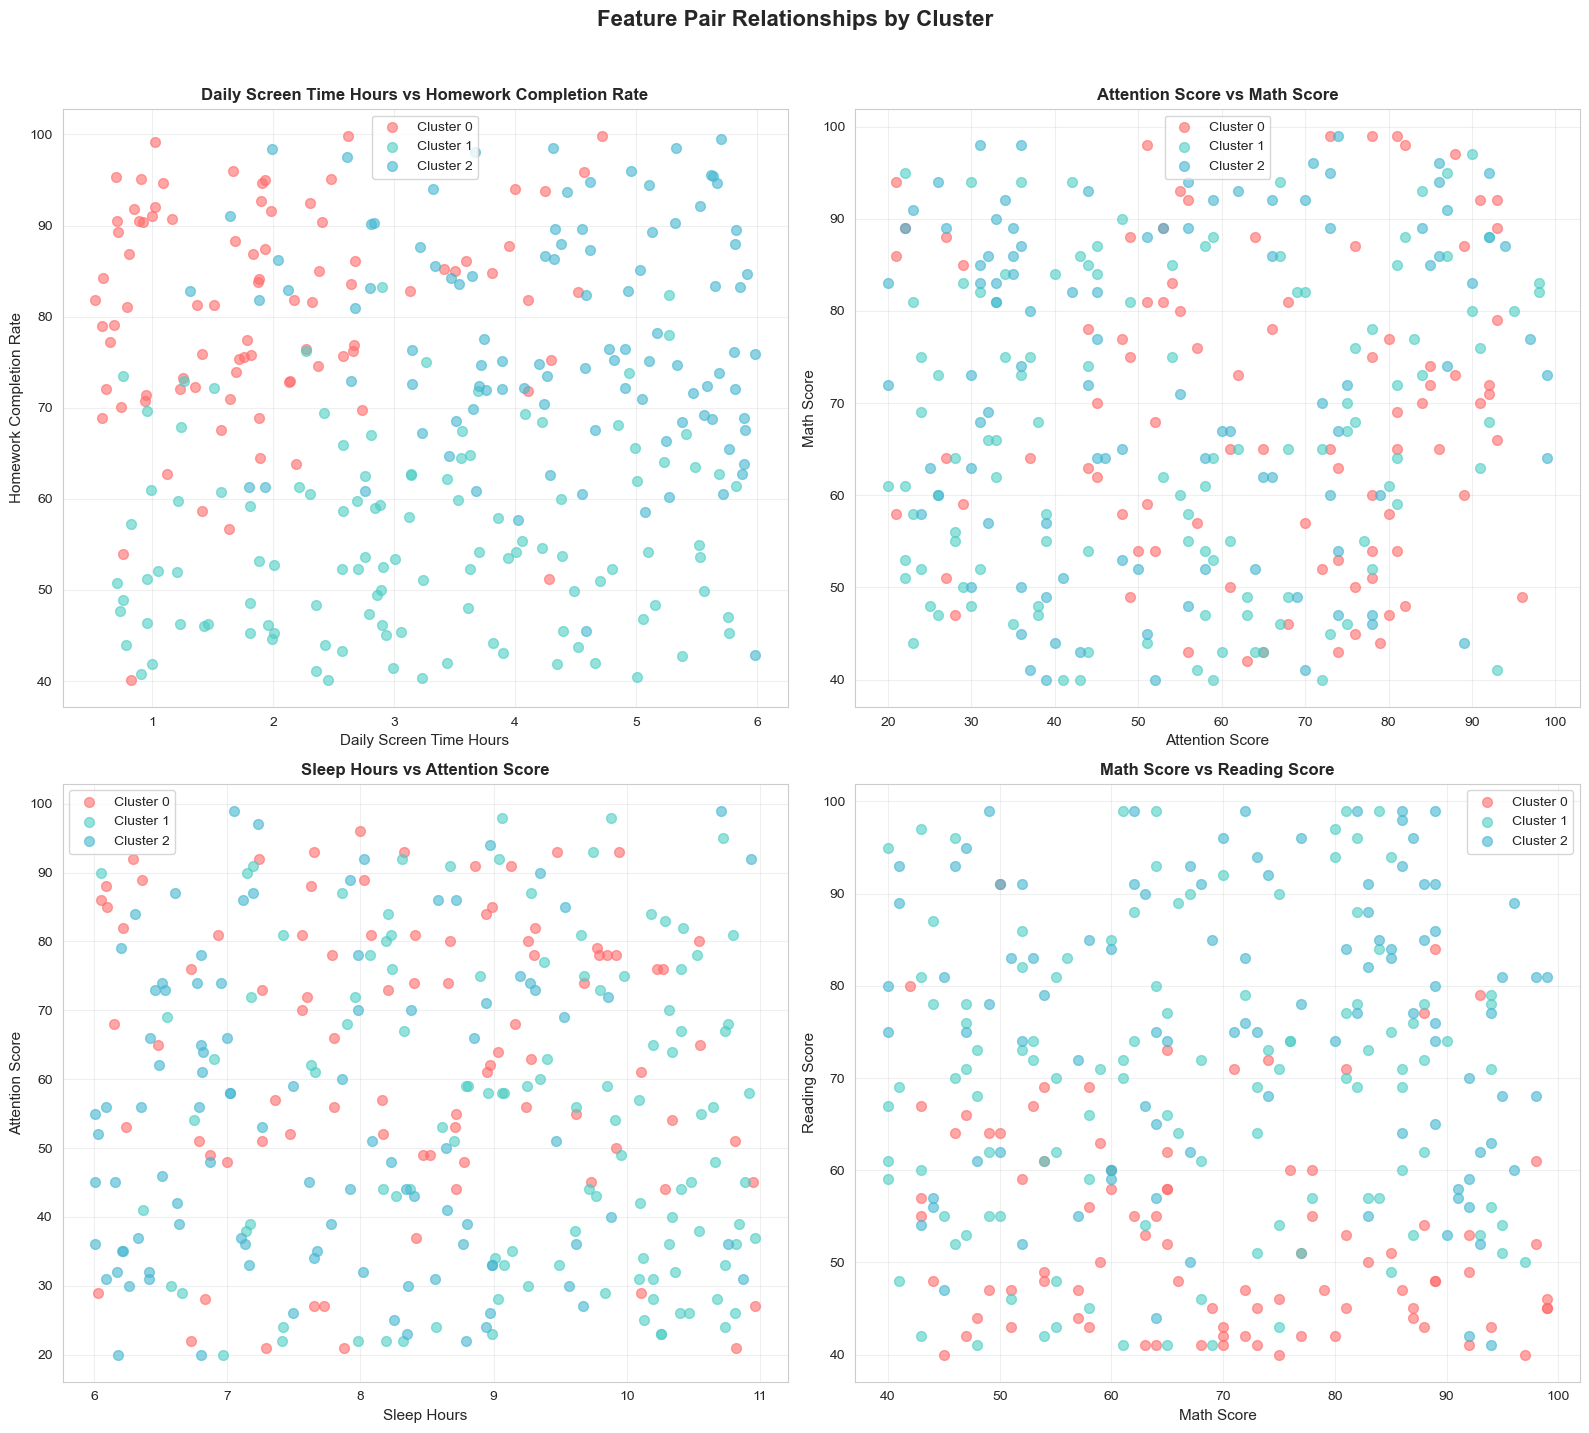

In [6]:
# Create all visualizations
if clustered_file:
    print("Creating additional visualizations...")
    create_feature_comparison_plot(df_clustered, feature_names, k)
    create_cluster_heatmap(cluster_stats, k)
    create_interactive_scatter(df_clustered, feature_names, k)
    print("\nAll visualizations created successfully!")
